## MSDA204: DATA SCIENCE CAPSTONE PROJECT

## **MACHINE LEARNING FOR HYPERTENSION**

#### SmartHealth: A Data-Driven Hypertension Management System for Personalized Care 


##### AUTHOUR:
#### HUDSON BARASA WALUKHA


### Overview
Globally, hypertension affects three out of every ten individuals. In Kenya, the prevalence of hypertension stands at 24%, with a concerning 78% of diagnosed individuals not receiving treatment. Furthermore, among those receiving treatment, only a mere 3% have managed to achieve adequate blood pressure control, as reported by the STEPS Survey 2015 conducted by the Ministry of Health in Kenya.

Given the rising prevalence of hypertension and the absence of effective post-hospitalization monitoring mechanisms, there's an urgent requirement for an integrated system capable of collecting and analyzing pertinent patient health data. Such a system would facilitate proactive interventions and personalized care, ultimately enhancing patient outcomes and decision-making.

The objective of this system is to address the gap in patient monitoring by empowering healthcare professionals to access and interpret patient data efficiently. This will enable timely interventions and support for individuals managing hypertension, thereby improving their overall health outcomes and informing future treatment strategies.

### Problem Statement

>>> Most individuals do not go to hospitals to have their blood pressure measured on a regular basis and so hypertension is either noticed later on in life when it has done great damage or its discovered when an individual has died. This project aims to look into this issue and provide a solution to how patients can track their blood pressure readings

### Main Objective

>>> Design and implement a data-driven hypertension management system that can be able to classify whether a patient is at risk of getting hypertension or not based on factors such as sex, age, diet, BMI, and underlying health conditions among others, this will  allow the patients to monitor their blood pressure and also get tailored suggestions on how to manage their hypertension.

### Specific Objectives

1. Identify the key features and factors that greatly contribute to individual's having hypertension.

2. Clean and preprocess the hypertension data.

3. Develop and implement classification algorithms that can identify whether an individual has hypertension or not based on a user's individual characteristics such as age, gender, degree of physical activity, body mass index, and dietary customs.

4. Develop a user - friendly interface for patients to input their daily health data and receive intelligent personalised feedback and guidance on managing their condition.
 
5. Deploy a hypertension management system , and conduct user testing to gather feedback and identify areas for improvement.

### Metric for Success

The hypertension prediction model will be considered successful if it meets the following success criteria :

1. Have a precision score of 70% and above 

2. Have an AUC score of 0.9 and above 

### Data Understanding

The dataset used for this project is sourced from Kaggle

The dataset contains 5841 responses and 12 features. The target variable is the hypertension column that indicates whether a patient has hypertension or not.

Below are the features of the dataset:

* gender: Gender of the patient (Male, Female, Other)
* age: Age of the patient
* hypertension: 0 if the patient doesn’t have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn’t have any heart diseases, 1 if the patient has a heart disease
* bmi: Body Mass Index of the patient
* HbA1c_level: HbA1c (glycated haemoglobin) is a measure of the average blood glucose level over the past
`2-3 months
* Sleep Hours: Hours of sleep of the patient
* Diet: The kind of diet the patient takes
* blood_glucose_level: Average glucose level in blood of the patient
* Stress Levels: stress levels of a patient on a scale of 1 to 10
* smoking_history: Smoking status of the patient
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [35]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE
import pickle

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


Load Data

In [2]:
def load_data(path):

    """A simple function to load data"""

    data = pd.read_csv(path)
    return data

In [3]:
# load csv file

df = load_data('data\hypertension_management_data.csv')
df.head()

,gender,age,diabetes,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Stress Levels,Sleep Hours,Diet,hypertension
0,Female,80.0,0,1,never,25.19,6.6,140,9,6,Average,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,1,7,Unhealthy,0
2,Male,28.0,0,0,never,27.32,5.7,158,9,4,Healthy,0
3,Female,36.0,0,0,current,23.45,5.0,155,9,4,Average,0
4,Male,76.0,0,1,current,20.14,4.8,155,2,10,Unhealthy,1


In [4]:
def check_data_info(data):

    """A simple function to check dataframe information"""
    
    # dataset name
    dataset_name = input("Name of the Dataset")

    # check shape
    print(f'The {dataset_name} contains {data.shape[0]} rows, and {data.shape[1]} columns')

    # check columns
    print('\n The columns in the dataset are : \n', data.columns)

    # check descriptive analysis
    descriptive_analysis = data.describe()
    print('\n Below is the Descriptive Analysis of the Dataset')
    return descriptive_analysis
    

In [5]:
def metadata_info(data):

    """A simple function to check metadata information """
    
    metadata = data.info()
    print('\n Above is the metadata for the dataset')
    return metadata

In [6]:
# check dataframe information

check_data_info(df)

The Hypertension Dataset contains 5841 rows, and 12 columns

 The columns in the dataset are : 
 Index(['gender', 'age', 'diabetes', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'Stress Levels', 'Sleep Hours',
       'Diet', 'hypertension'],
      dtype='object')

 Below is the Descriptive Analysis of the Dataset


,age,diabetes,heart_disease,bmi,HbA1c_level,blood_glucose_level,Stress Levels,Sleep Hours,hypertension
count,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000,5841.000000
mean,42.146461,0.086458,0.038521,27.346150,5.539171,138.027564,5.486047,7.004794,0.076357
std,22.607359,0.281063,0.192466,6.714876,1.082972,41.001876,2.856293,1.972580,0.265591
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,1.000000,4.000000,0.000000
25%,24.000000,0.000000,0.000000,23.710000,4.800000,100.000000,3.000000,5.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,5.000000,7.000000,0.000000
75%,60.000000,0.000000,0.000000,29.550000,6.200000,159.000000,8.000000,9.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,10.000000,10.000000,1.000000


*The average age of participants in the dataset is 42 years*

In [7]:
# healthcare metadata

metadata_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5841 non-null   object 
 1   age                  5841 non-null   float64
 2   diabetes             5841 non-null   int64  
 3   heart_disease        5841 non-null   int64  
 4   smoking_history      5841 non-null   object 
 5   bmi                  5841 non-null   float64
 6   HbA1c_level          5841 non-null   float64
 7   blood_glucose_level  5841 non-null   int64  
 8   Stress Levels        5841 non-null   int64  
 9   Sleep Hours          5841 non-null   int64  
 10  Diet                 5841 non-null   object 
 11  hypertension         5841 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 547.7+ KB

 Above is the metadata for the dataset


### Data Cleaning 

The following were conducted during this step :

* Managing missing data: This involves handling any missing values within the dataset using suitable methods like imputation or elimination, based on the context and importance of the missing information.

* Resolving duplicate entries: Detecting and eliminating any duplicate rows in the dataset to prevent skewed results and uphold the accuracy of the data.

* Rectifying column labels: Adjusting the names of columns that are unclear to enhance clarity and comprehension.

* Adjusting data formats: Converting data into appropriate formats to facilitate easier analysis


Fixing the Data Structure

In [8]:
def fix_data_structure(data):

    """A simple fuction to fix the dataset data structure"""

    # lower column names
    data.columns = [col.lower() for col in data.columns]

In [9]:
# fix hypertension dataset data structure

fix_data_structure(df)

In [10]:
def remove_whitespaces(data):

    """A simple function to remove whitespaces"""

    # remove whitespaces
    
    data.columns = [col.replace(' ', "_") for col in data.columns]

In [11]:
# remove whitespaces from the columns

remove_whitespaces(df)

In [12]:
# change age data type to integer

df['age'] = df['age'].astype(int)

In [14]:
# rename diabetes to has_diabetes
# rename heart_disease to has_heart_disease
# rename smoking history to smoking_status
# rename bmi to body_mass_index
# rename hba1c_level to glycated_haemoglobin
# rename blood_glucose_level to average_glucose_level
# rename sleep_hours to hours_of_sleep
# rename hypertension to has_hypertension

df.rename(columns = {'diabetes' : 'has_diabetes',
                     "heart_disease" : 'has_heart_disease',
                     'smoking_history' : "smoking_status",
                     "bmi": "body_mass_index",
                     "hba1c_level" : "glycated_haemoglobin",
                     "blood_glucose_level" : "average_glucose_level",
                     "sleep_hours":"hours_of_sleep",
                     "hypertension" : "has_hypertension"}, inplace= True)

In [15]:
# replace number place holders with 
# understandable attribute information
# i.e replace 1 with Yes, to mean the patient has hypertension
# replace 0 with No, to mean the patient does not have hypertension

df['has_diabetes'].replace(to_replace = 0,
                           value = 'No',
                           inplace = True)

df['has_diabetes'].replace(to_replace = 1,
                           value = 'Yes',
                           inplace = True)

df['has_heart_disease'].replace(to_replace = 0,
                                value = 'No',
                                inplace = True)

df['has_heart_disease'].replace(to_replace = 1,
                                value = 'Yes',
                                inplace = True)

df['has_hypertension'].replace(to_replace = 0,
                               value = 'No',
                               inplace = True)

df['has_hypertension'].replace(to_replace = 1,
                               value = 'Yes',
                               inplace = True)

df['smoking_status'].replace(to_replace = 'No Info',
                             value = 'unknown',
                             inplace = True)

df['smoking_status'].replace(to_replace = 'never',
                             value = 'never smoked',
                             inplace = True)

df['smoking_status'].replace(to_replace = 'former',
                             value = 'formerly smoked',
                             inplace = True)

df['smoking_status'].replace(to_replace = 'current',
                             value = 'smokes',
                             inplace = True)

df['smoking_status'].replace(to_replace = 'not current',
                             value = 'stopped smoking',
                             inplace = True)

df['smoking_status'].replace(to_replace = 'ever',
                             value = 'always smoking',
                             inplace = True)

In [16]:
# preview the dataset after fixing the data structure

df.head()

,gender,age,has_diabetes,has_heart_disease,smoking_status,body_mass_index,glycated_haemoglobin,average_glucose_level,stress_levels,hours_of_sleep,diet,has_hypertension
0,Female,80,No,Yes,never smoked,25.19,6.6,140,9,6,Average,No
1,Female,54,No,No,unknown,27.32,6.6,80,1,7,Unhealthy,No
2,Male,28,No,No,never smoked,27.32,5.7,158,9,4,Healthy,No
3,Female,36,No,No,smokes,23.45,5.0,155,9,4,Average,No
4,Male,76,No,Yes,smokes,20.14,4.8,155,2,10,Unhealthy,Yes


Duplicate Entries

In [17]:
def check_treat_duplicates(data):

    """A simple function to check and remove duplicate entries """

    # check duplicates 

    duplicates = data.duplicated().sum()
    print(f'There are {duplicates} Duplicate Entries in the Hypertension Dataset')

    
    # drop duplicates if present
    
    if duplicates > 0:
        data.drop_duplicates(inplace = True)

In [18]:
# check and treat for duplicates in the healthcare dataset

check_treat_duplicates(df)

There are 0 Duplicate Entries in the Hypertension Dataset


Missing Values

In [19]:
def check_missing_values(data):

    """A simple function to check missing values in the dataset"""

    missing_val = data.isnull().sum()
    missing_val_percent = round((missing_val / len(data)) * 100, 2)
    missing_val_dataframe = pd.DataFrame({"Missing Values" : missing_val,
                                          "Missing_Values_Percentage" : missing_val_percent})
    return missing_val_dataframe

In [20]:
# check missing values in the hypertension data

check_missing_values(df)

,Missing Values,Missing_Values_Percentage
gender,0,0.0
age,0,0.0
has_diabetes,0,0.0
has_heart_disease,0,0.0
smoking_status,0,0.0
body_mass_index,0,0.0
glycated_haemoglobin,0,0.0
average_glucose_level,0,0.0
stress_levels,0,0.0
hours_of_sleep,0,0.0


*Great, looks like there no missing values in the dataset. Let's move to Exploratory Data Analysis*

In [22]:
# preview the dataset after cleaning

df.head()

,gender,age,has_diabetes,has_heart_disease,smoking_status,body_mass_index,glycated_haemoglobin,average_glucose_level,stress_levels,hours_of_sleep,diet,has_hypertension
0,Female,80,No,Yes,never smoked,25.19,6.6,140,9,6,Average,No
1,Female,54,No,No,unknown,27.32,6.6,80,1,7,Unhealthy,No
2,Male,28,No,No,never smoked,27.32,5.7,158,9,4,Healthy,No
3,Female,36,No,No,smokes,23.45,5.0,155,9,4,Average,No
4,Male,76,No,Yes,smokes,20.14,4.8,155,2,10,Unhealthy,Yes


#### Data Visualization

>> The following analysis will be performed :

>> * Univariate Analysis: Explores each variable in the dataset separately

>> * Bivariate Analysis: Explores the analysis of two variables to be able to determine the relationship between the two

#### **Smoking Status Distribution**

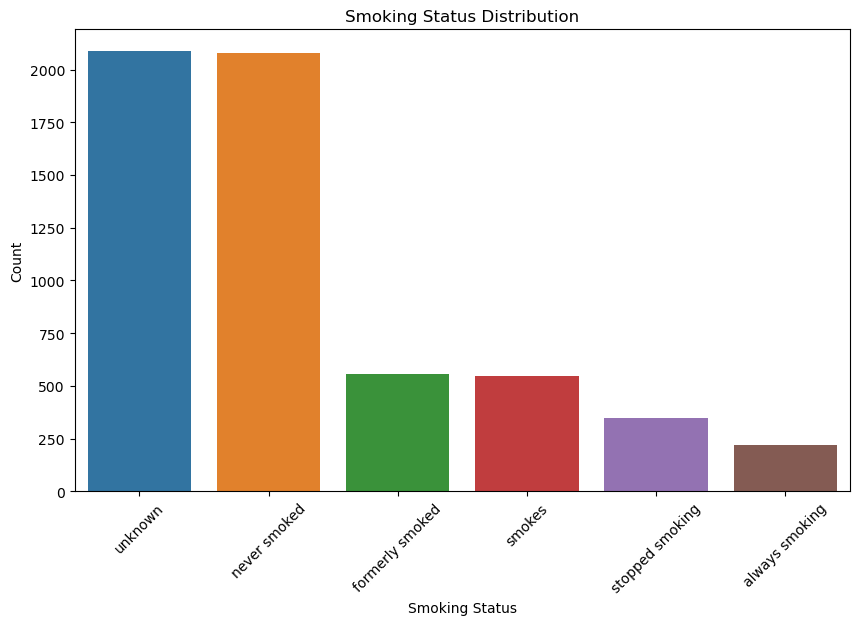

In [23]:
def bar_plot(data, col, title):
    
    fig, ax = plt.subplots(figsize = (10, 6))

    column_groupings = data[col].value_counts()
    sns.barplot(x = column_groupings.head(10).index, y = column_groupings.head(10))
    plt.title(title)
    plt.xticks(rotation = 45 )
    plt.xlabel('Smoking Status')
    plt.ylabel('Count', fontsize = 10)

bar_plot(df, 'smoking_status', 'Smoking Status Distribution')

*most individuals have never smoked or their smoking information is not available*

#### **Gender Distribution**

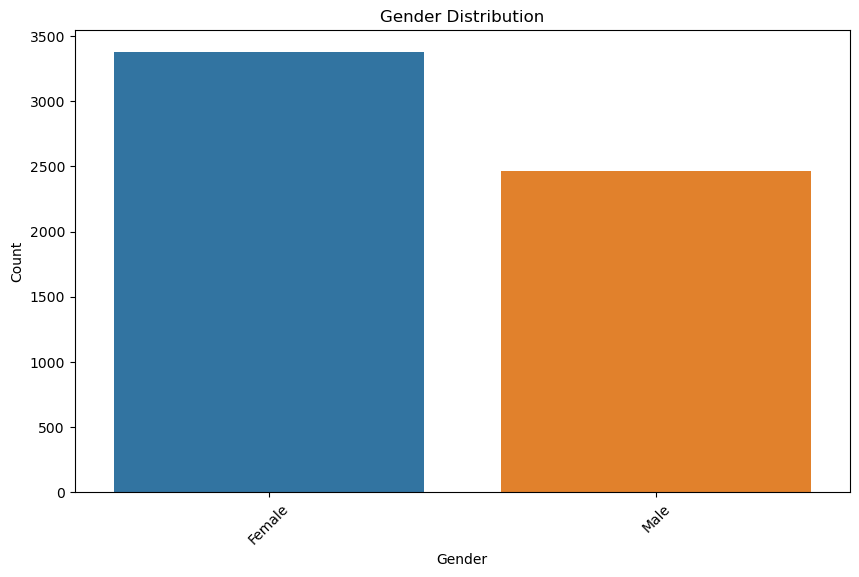

In [24]:
def bar_plot(data, col, title):
    
    fig, ax = plt.subplots(figsize = (10, 6))

    column_groupings = data[col].value_counts()
    sns.barplot(x = column_groupings.head(10).index, y = column_groupings.head(10))
    plt.title(title)
    plt.xticks(rotation = 45 )
    plt.xlabel('Gender')
    plt.ylabel('Count', fontsize = 10)

bar_plot(df, 'gender', 'Gender Distribution')

*The dataset mostly comprises of females*

#### **Diabetes by Hypertension**

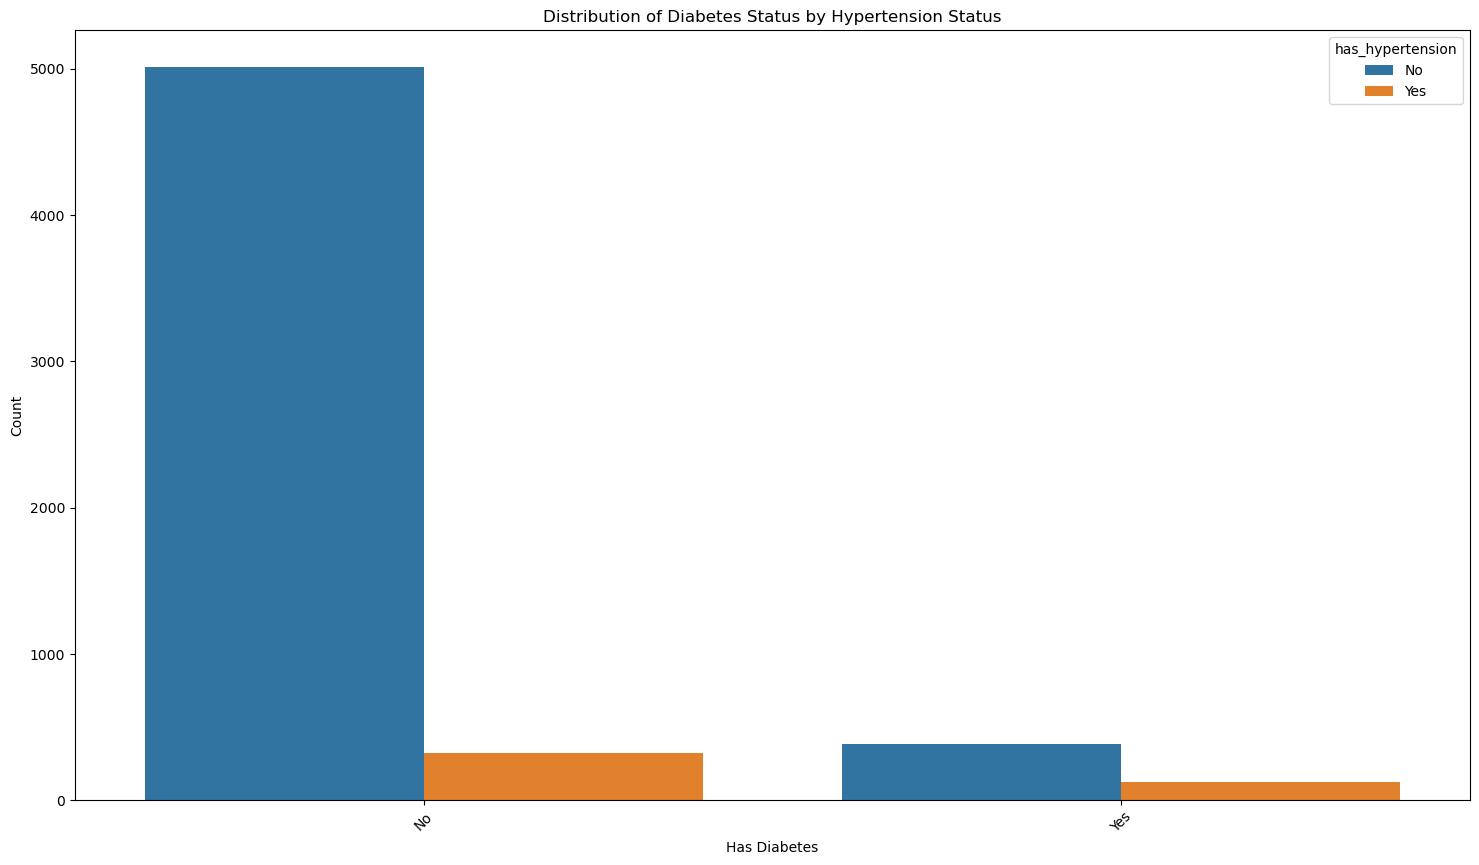

In [25]:
plt.figure(figsize = (18, 10))
ax = sns.countplot(x = 'has_diabetes', hue = 'has_hypertension', data = df)
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Diabetes Status')
plt.title('Distribution of Diabetes Status by Hypertension Status')
plt.show()

*No significant correlation between hypertension and diabetes based on the statistical analysis*

#### **Heart Disease by Hypertension**

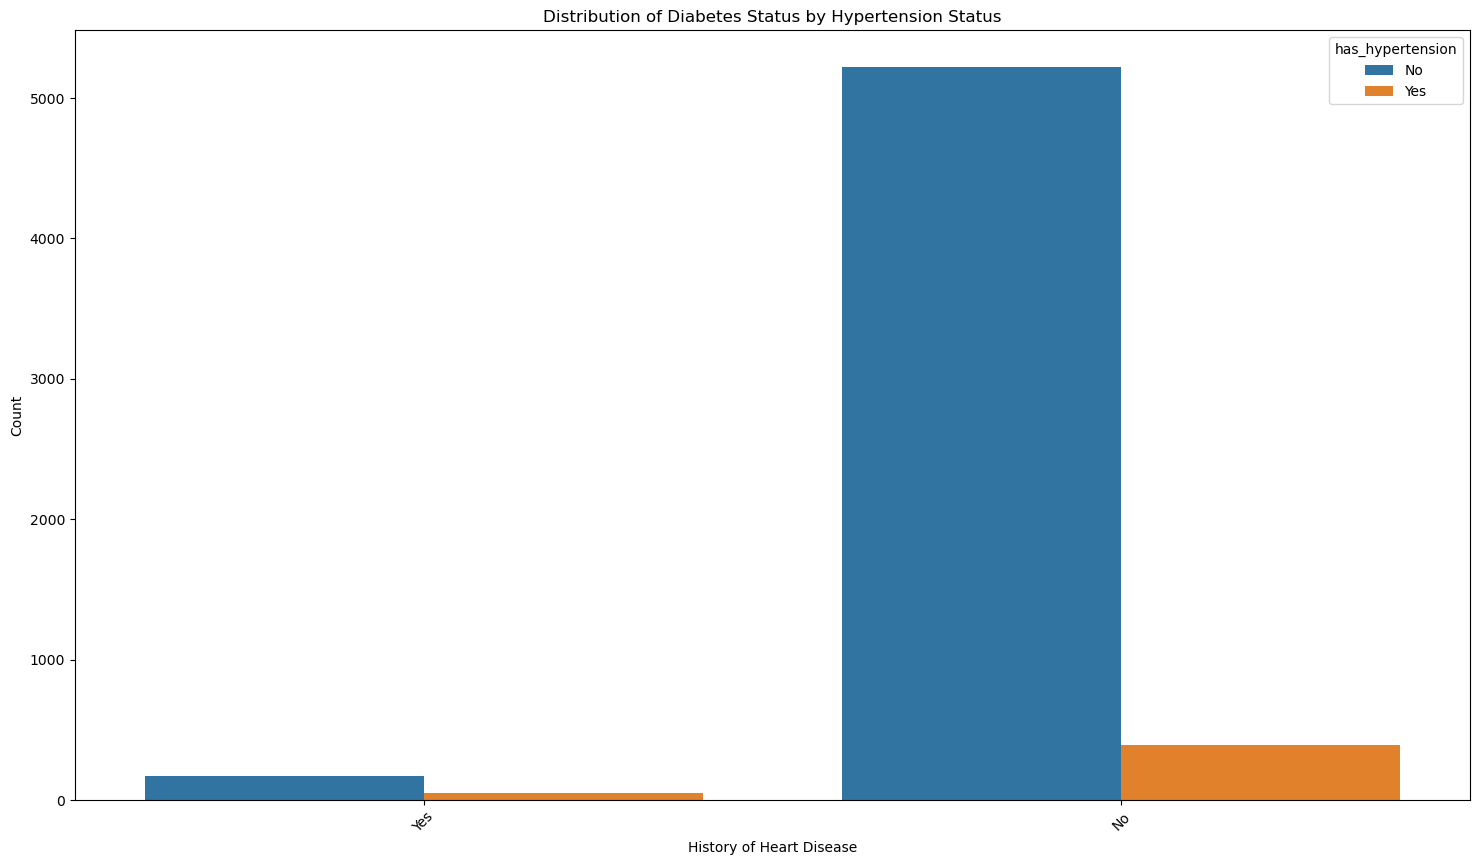

In [27]:
plt.figure(figsize = (18, 10))
ax = sns.countplot(x = 'has_heart_disease', hue = 'has_hypertension', data = df)
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('History of Heart Disease')
plt.title('Distribution of Diabetes Status by Hypertension Status')
plt.show()

*No significant correlation between hypertension and heart disease based on the statistical analysis*

#### **Diet by Hypertension**

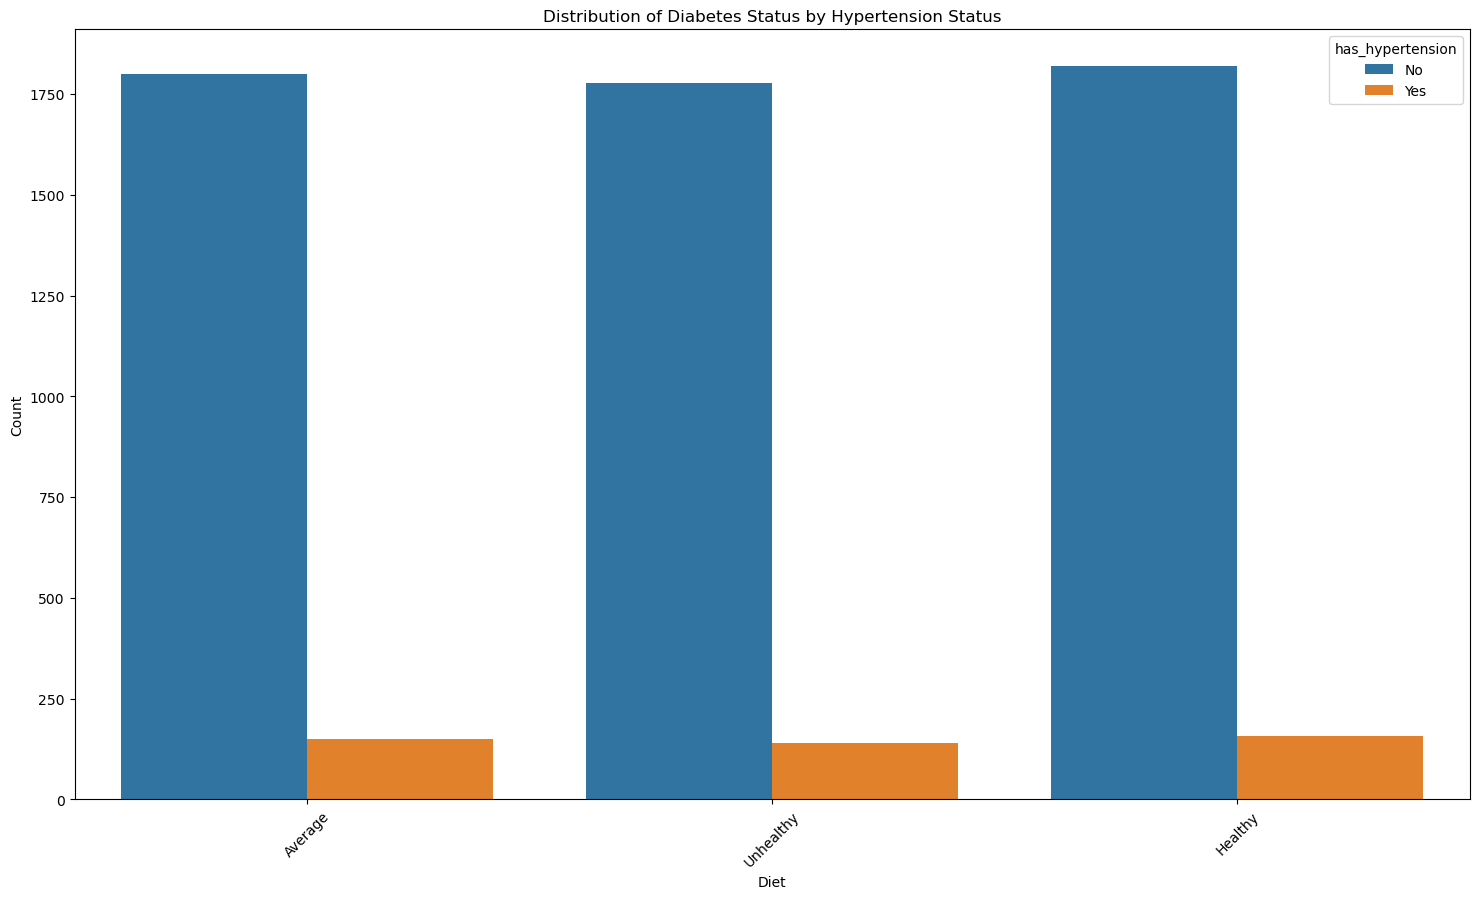

In [28]:
plt.figure(figsize = (18, 10))
ax = sns.countplot(x = 'diet', hue = 'has_hypertension', data = df)
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Diet')
plt.title('Distribution of Diabetes Status by Hypertension Status')
plt.show()

*Individuals who recorded having an average diet recorded a slightly higher chance of having hypertension*

#### **BMI Distribution**

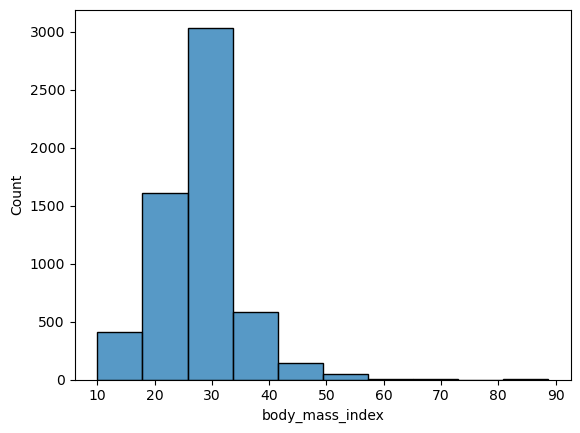

In [36]:
sns.histplot(data = df, x = 'body_mass_index', bins = 10)
plt.show()

*The above shows a normal distribution*

#### **Average Glucose Level Distribution**

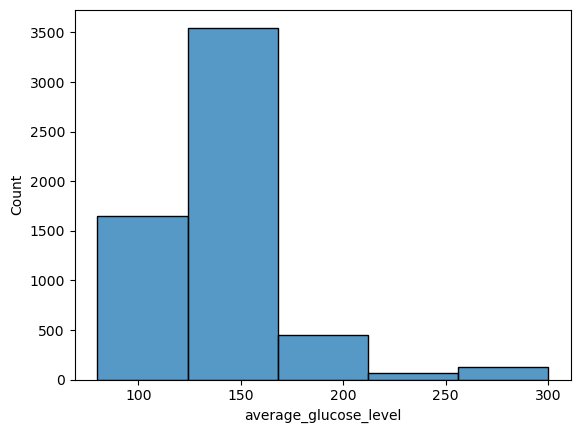

In [37]:
sns.histplot(data = df, x = 'average_glucose_level', bins = 5)
plt.show()

*The above shows distribution skewed to the right*

#### Data Preprocessing 

The following steps were applied :

* Feature Scaling : Normalizing numerical features ensures they are uniformly scaled, preventing any individual feature from overpowering the model.

* Encoding categorical variables : Transforming categorical variables into numerical format appropriate for modeling, achieved by assigning each unique category a consecutive numerical value.

* Class Imbalance : using SMOTE (Synthetic Minority Oversampling) to mitigate significant disparities between classes. This approach enhances the model's specificity, sensitivity, and precision by generating synthetic samples for the minority class

In [28]:
# preview the dataset

df.head()

,gender,age,has_diabetes,has_heart_disease,smoking_status,body_mass_index,glycated_haemoglobin,average_glucose_level,stress_levels,hours_of_sleep,diet,has_hypertension
0,Female,80,No,Yes,never smoked,25.19,6.6,140,9,6,Average,No
1,Female,54,No,No,unknown,27.32,6.6,80,1,7,Unhealthy,No
2,Male,28,No,No,never smoked,27.32,5.7,158,9,4,Healthy,No
3,Female,36,No,No,smokes,23.45,5.0,155,9,4,Average,No
4,Male,76,No,Yes,smokes,20.14,4.8,155,2,10,Unhealthy,Yes


In [38]:
# change binary values into 1 and 0 so that 
# they can be fed into the machine learning models
# assign numeric values to categorical columns

# create a copy of the dataframe

df_copy = df.copy()

# diabetes mappings

has_diabetes_mapping = {'No' : 0, 'Yes': 1}

# heart disease mappings

has_heart_disease_mapping = {'No' : 0, 'Yes': 1}

# hypertension mappings

has_hypertension_mapping = {'No' : 0, 'Yes': 1}

# gender mappings

gender_mapping ={'Female' : 0, 'Male' : 1}

# diet mappings

diet_mapping = {'Healthy' : 1, 'Average' : 2, 'Unhealthy': 3}

# smoking status mappings

smoking_status_mapping = {'unknown' : 1, 'never smoked' : 2, "formerly smoked" : 3, "smokes" : 4, "stopped smoking" : 5, "always smoking" : 6}

# replace columns with numerical representations

df_copy['has_diabetes'] = df_copy['has_diabetes'].replace(has_diabetes_mapping)
df_copy['has_heart_disease'] = df_copy['has_heart_disease'].replace(has_heart_disease_mapping)
df_copy['has_hypertension'] = df_copy['has_hypertension'].replace(has_hypertension_mapping)
df_copy['gender'] = df_copy['gender'].replace(gender_mapping)
df_copy['diet'] = df_copy['diet'].replace(diet_mapping)
df_copy['smoking_status'] = df_copy['smoking_status'].replace(smoking_status_mapping)

In [39]:
new_df = df_copy

# preview dataset
new_df.head()

,gender,age,has_diabetes,has_heart_disease,smoking_status,body_mass_index,glycated_haemoglobin,average_glucose_level,stress_levels,hours_of_sleep,diet,has_hypertension
0,0,80,0,1,2,25.19,6.6,140,9,6,2,0
1,0,54,0,0,1,27.32,6.6,80,1,7,3,0
2,1,28,0,0,2,27.32,5.7,158,9,4,1,0
3,0,36,0,0,4,23.45,5.0,155,9,4,2,0
4,1,76,0,1,4,20.14,4.8,155,2,10,3,1


In [40]:
# define x and y 

x = new_df.drop(columns = ['has_hypertension'])
y = new_df['has_hypertension']

In [41]:
# use SMOTE to overcome class imbalance

oversample = SMOTE()
x_sm, y_sm = oversample.fit_resample(x, y)

In [42]:
# split data

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)

#### Modelling 

K-Nearest Neighbors

K-Nearest Neighbours (KNN) from scikit-learn is a supervised learning algorithm. It assigns a new data point to the class based on the majority vote of its K nearest neighbours in the feature space.

In [37]:
# create a pipeline 

pipe_1 = Pipeline([
    ('ss', StandardScaler()),
    ('neighbors', KNeighborsClassifier())
    ])

# fit train data

pipe_1.fit(x_train, y_train)

# predict on test data

y_pred_1 = pipe_1.predict(x_test)

In [38]:
def print_metrics(labels, preds):

    """A simple function to generate classification metrics"""

    print("Precision Score: {}". format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score:{}".format(accuracy_score(labels, preds)))
    print("F1 SCore: {}".format(f1_score(labels, preds, average = 'weighted')))

In [39]:
# classification metrics score

print_metrics(y_test, y_pred_1)

Precision Score: 0.8553869685552804
Recall Score: 0.8331788693234476
Accuracy Score:0.8331788693234476
F1 SCore: 0.8307661403193247


Decision Tree Classifier

Decision trees are a supervised machine learning algorithm used to classify or estimate continuous values by partitioning the sample space as efficiently as possible into sets with similar data points until you get to a homogenous set and can reasonably predict the value for new data points


In [40]:
# create pipeline

pipe_2 = Pipeline([
    ('mms', MinMaxScaler()),
    ('dts', DecisionTreeClassifier())
    ])

# fit train data

pipe_2.fit(x_train, y_train)

# predict on test data 

y_pred_2 = pipe_2.predict(x_test)

In [41]:
# classification metrics

print_metrics(y_test, y_pred_2)

Precision Score: 0.8733902411628074
Recall Score: 0.8725671918443003
Accuracy Score:0.8725671918443003
F1 SCore: 0.8725283006851987


Random Forest Classifier

Random Forest is built on decision trees. They operate by growing many classification trees. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest), thus creating high variance among all trees in our forest.


In [42]:
# create pipeline

pipe_3 = Pipeline([('rf', RandomForestClassifier())])

# fit on train data

pipe_3.fit(x_train, y_train)

# predict on test data

y_pred_3 = pipe_3.predict(x_test)

In [43]:
# classifiction metrics

print_metrics(y_test, y_pred_3)

Precision Score: 0.9248377196174814
Recall Score: 0.9244670991658943
Accuracy Score:0.9244670991658943
F1 SCore: 0.9244615682259024


Tuning Random Forest Classifier

In [44]:
# create a pipeline

pipe_4 = Pipeline([('forest', RandomForestClassifier())])

# create a grid parameter

grid = {'forest__criterion' : ['gini', 'entropy'],
        'forest__max_depth' : [6, 7],
        'forest__max_features' : [1.0],
        'forest__n_estimators' : [100, 200]}

# create grid with pipe as an estimator 

gridsearch = GridSearchCV(estimator = pipe_4,
                          param_grid = grid,
                          scoring = 'accuracy',
                          cv = 5)

# fit on train data 

gridsearch.fit(x_train, y_train)

# predict on test data

y_pred_4 = gridsearch.predict(x_test)

In [45]:
# classification metrics 

print_metrics(y_test, y_pred_4)

Precision Score: 0.8590241394761597
Recall Score: 0.8526413345690455
Accuracy Score:0.8526413345690455
F1 SCore: 0.8520913997295066


Adaptive Boosting 

Adaboost is a non - parametric model, it creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner.

In [46]:
pipe_5 = Pipeline([('ada', AdaBoostClassifier())])

pipe_5.fit(x_train, y_train)

y_pred_5 = pipe_5.predict(x_test)

In [47]:
print_metrics(y_test, y_pred_5)


Precision Score: 0.8500198275940943
Recall Score: 0.8489341983317887
Accuracy Score:0.8489341983317887
F1 SCore: 0.8488626812881765


In [48]:
# get predicted class probabilities for the test set 

y_pred_prob = pipe_3.predict_proba(x_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

# Compute the AUC score 
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9800028518882163


#### Evaluation

>> The success metric used for this project was a precison score of 70% + and an AUC score of 0.9 and beyond, from the models tested above, the model that achieved the desired precision and AUC score is the baseline Random Forest Classifier. The model had a precision score of 92.48% and approximately an AUC score of 0.98, this was an improvement from the first model, the K-Nearest Neighbor model which was the first model and had a precision score of 85.54 %

#### Conclusions

* A deeper look into the relationship between diet and hypertension could offer insights into how dietary patterns potentially impact hypertension risk
* Exploring diverse risk factors beyond age, stress levels and BMI such as physical activity level and family history of hypertension can better help the understanding of hypertension dynamics
* Studying gender differences in hypertension rates is crucial due to the dataset's female bias. This enables targeted interventions.

#### Limitations

1. Imbalanced Feature Distribution : The target column which has information whether a patient has hypertension or not had a disproportionate number of patients not having hypertension, this made it hard for the model to predict the minority class.

2. Overfitting : The model does not generalize well when introduced with new data, this can cause an inaccurate prediction of hypertension status

3. To avoid the increase in columns, thus increase in dimensionality caused by one hot encoding, categorical columns were assigned a unique numerical value to each category of a feature, disregarding any order it may have had. The numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them, therefore, reducing the performance of the model.



#### Future Considerations

1. Integrate an automated alert system to notify healthcare providers of non-compliant patients, enabling timely follow-up and intervention to ensure proper hypertension management and care.

2. Integrate patient location data to identify nearby emergency centres and provide patients with easy access to immediate medical assistance when needed.

3. Create a tracking dashboard for healthcare providers to monitor patient data, identifytrends, and intervene when patient health is at risk.
 
4. Secure the web application to prevent any potential threat of stolen data


#### Deployment

Deployment allows the public to access the model built. An individual visiting the application is required to input some critical data points on the prediction page then it will predict whether the individual has hypertension or not. Due to the sensitivity of the project, being that it's in the healthcare sector, I thought it best to tell the user persona their chances of having hypertension are quite high instead of directly telling the individual they have hypertension. This might cause panic and can even discourage an individual from visiting their healthcare provider.
The web application is split into three pages to avoid overwhelming the user

*User Interface*

The first page is the welcome page, this page ushers in the user. The second page contains a visualisation dashboard that can be used by healthcare providers to analyse the data used to build the hypertension system.
Healthcare providers can use the dashboard to be on the lookout for patients with distinct patterns that are linked to hypertension and based on that they can encourage the patients to take more tests to check on their blood pressure.
The third page allows users to input their data and get predictions on whether they are at risk of getting hypertension

The deployment of this project was done using Streamlit.


In [49]:
# create a pickle file

pickle_out = open("classifier1.pkl", "wb")
pickle.dump(pipe_3, pickle_out)
pickle_out.close()

In [ ]:
# preview of the deployment

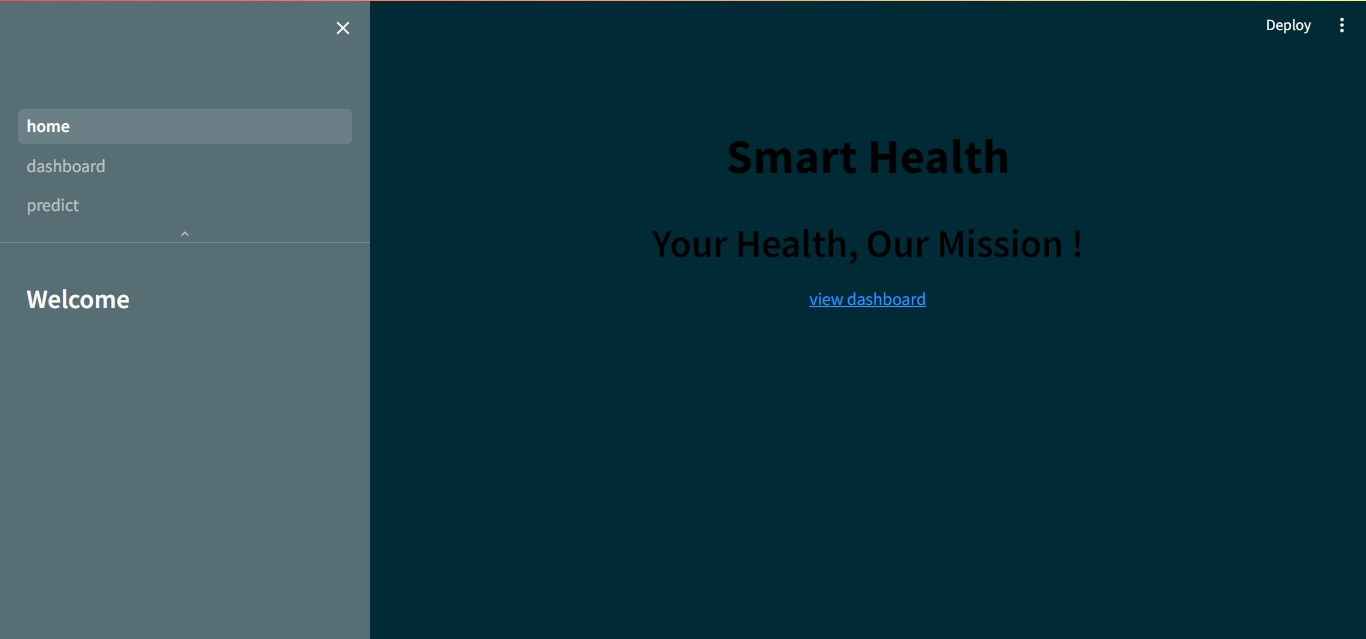

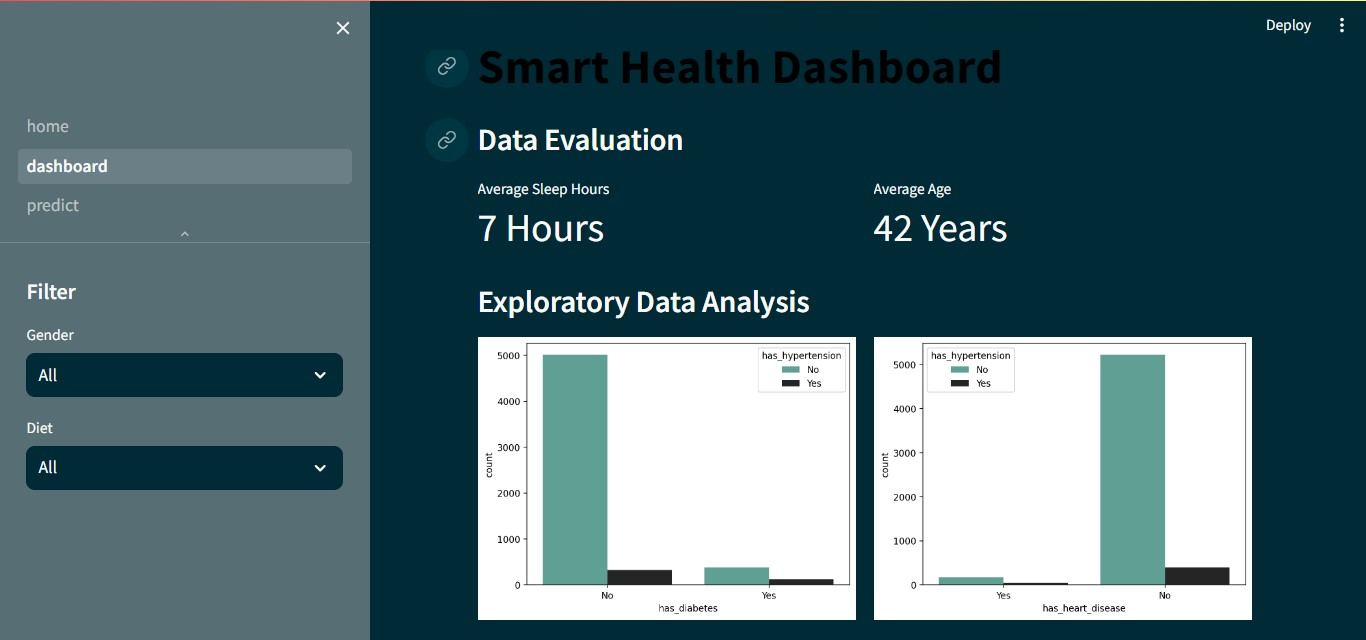

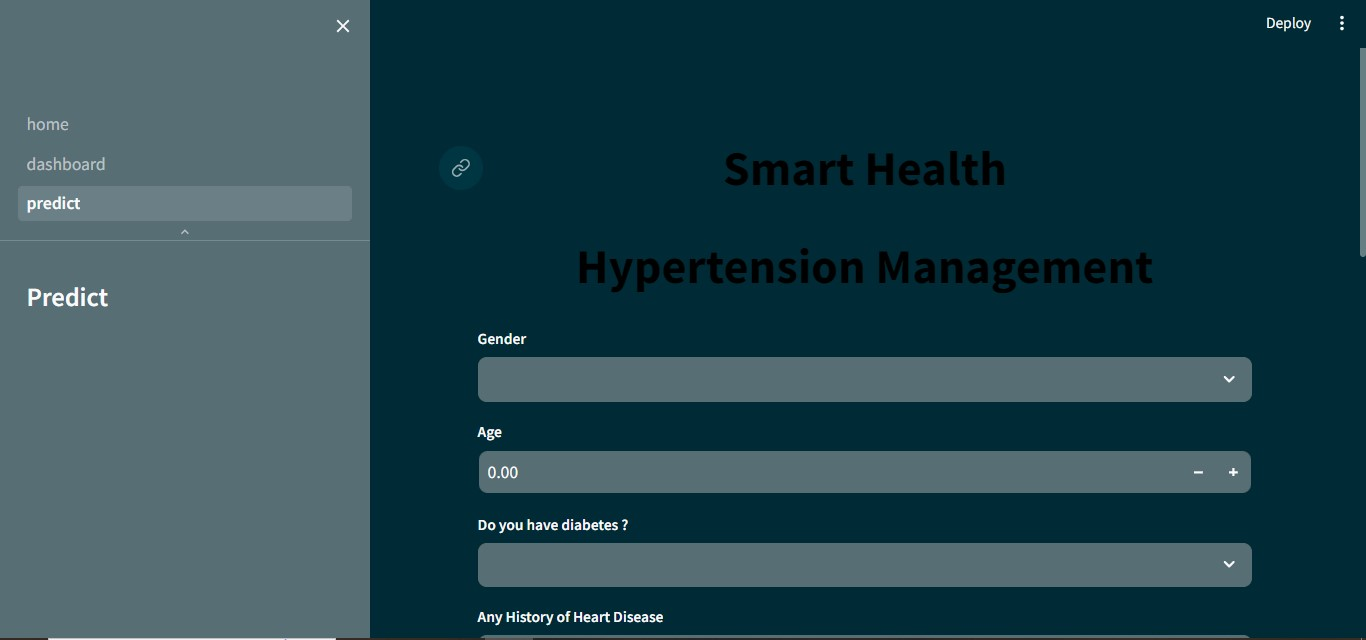

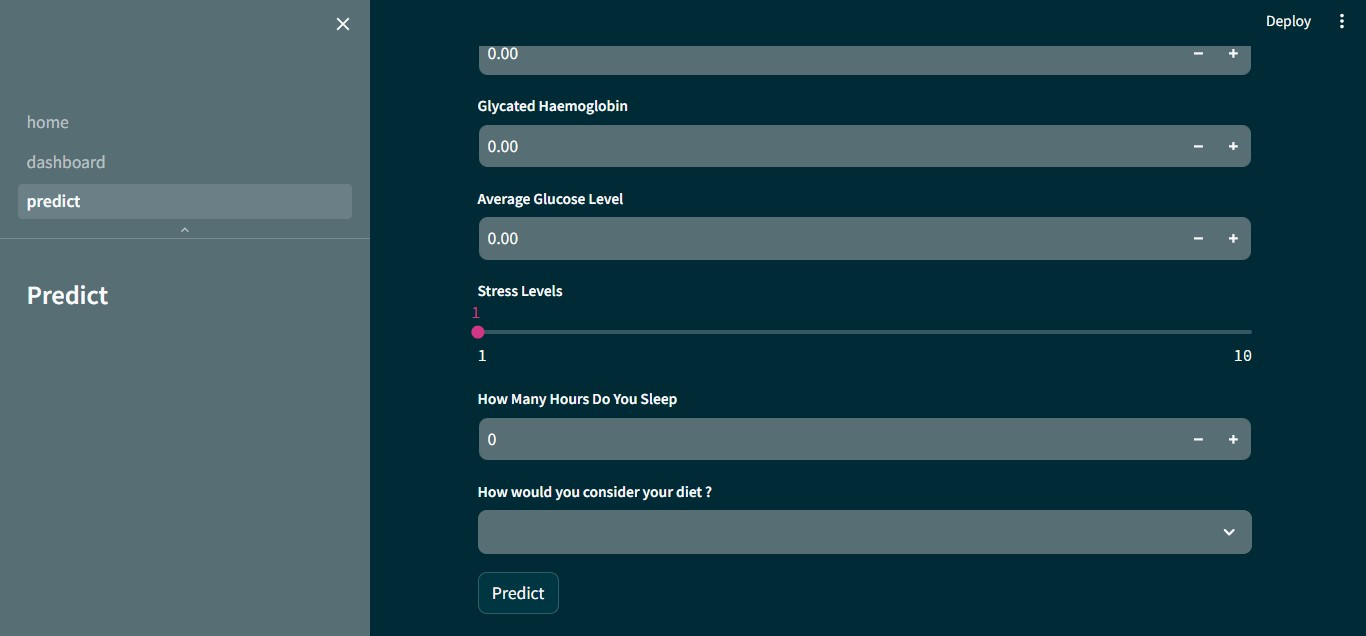

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\PC\Desktop\hypertension machine learning\clean_data.csv', index_col = 0)
df.head()

,gender,age,has_diabetes,has_heart_disease,smoking_status,body_mass_index,glycated_haemoglobin,average_glucose_level,stress_levels,hours_of_sleep,diet,has_hypertension
0,Female,80,No,Yes,never smoked,25.19,6.6,140,9,6,Average,No
1,Female,54,No,No,unknown,27.32,6.6,80,1,7,Unhealthy,No
2,Male,28,No,No,never smoked,27.32,5.7,158,9,4,Healthy,No
3,Female,36,No,No,smokes,23.45,5.0,155,9,4,Average,No
4,Male,76,No,Yes,smokes,20.14,4.8,155,2,10,Unhealthy,Yes
